In [6]:
import mysql.connector
from mysql.connector import Error


# Conectar a la base de datos
def conectar():
    try:
        conexion = mysql.connector.connect(
            host="localhost",
            user="root",
            password="sistemas",
            database="fdiscreta"
        )

        if conexion.is_connected():
            print("Connected to the database successfully")
            return conexion

    except Error as err:
        print(f"Failed to connect to the database: {err}")
        return None


# Cerrar la conexión a la base de datos
def cerrar_conexion(conexion):
    if conexion and conexion.is_connected():
        conexion.close()
        print("Connection closed successfully")


# Obtener las amistades desde la base de datos
def obtener_amistades(conexion):
    try:
        cursor = conexion.cursor()
        cursor.execute("SELECT id_usuario1, id_usuario2 FROM amistades")
        amistades = cursor.fetchall()
        return amistades
    except Error as err:
        print(f"Error fetching amistades: {err}")
        return []
    finally:
        cursor.close()


# Función para obtener los nombres de los usuarios desde la base de datos
def obtener_nombres_usuarios(conexion):
    try:
        cursor = conexion.cursor()
        cursor.execute("SELECT id, nombre FROM Usuarios")
        usuarios = cursor.fetchall()
        # Crear un diccionario con id como clave y nombre como valor
        return {usuario[0]: usuario[1] for usuario in usuarios}
    except Error as err:
        print(f"Error fetching user names: {err}")
        return {}
    finally:
        cursor.close()


Connected to the database successfully


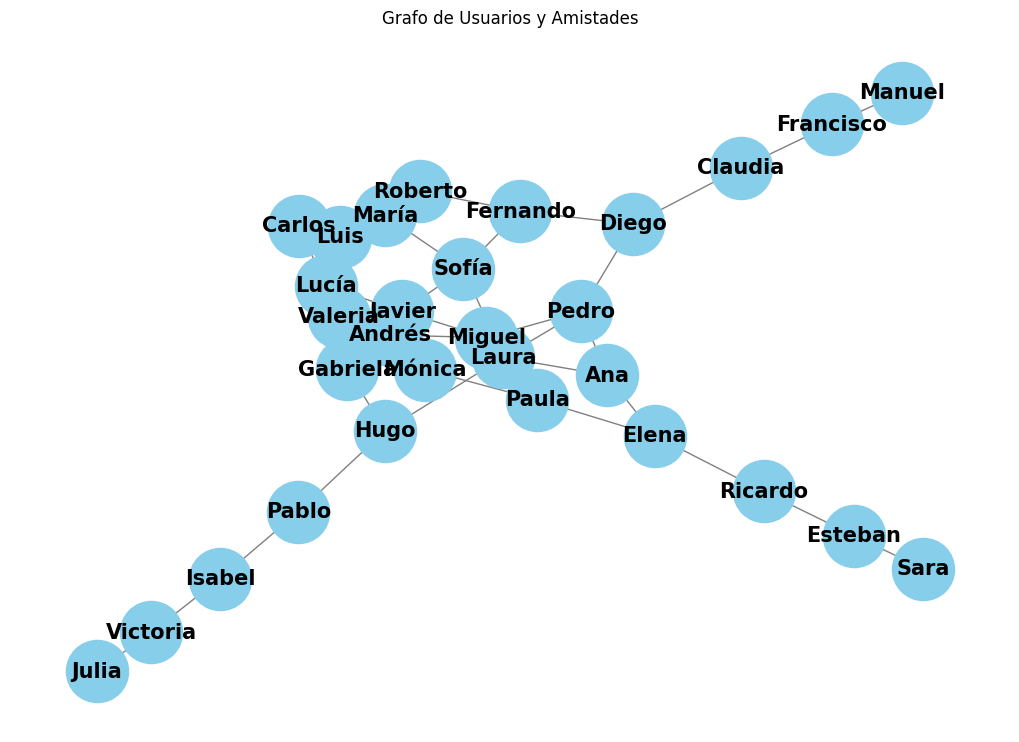

Connection closed successfully


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion


def crear_grafo(amistades, conexion):
    # Obtener los nombres de los usuarios desde la base de datos
    usuarios = obtener_nombres_usuarios(conexion)

    G = nx.Graph()

    # Recorrer las amistades y agregar las relaciones al grafo
    for usuario1, usuario2 in amistades:
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            G.add_edge(nombre_usuario1, nombre_usuario2)

    # Visualizar el grafo con Matplotlib
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)  # Layout de los nodos
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold',
            edge_color='gray')
    plt.title("Grafo de Usuarios y Amistades")
    plt.show()

    return G


def main():
    # Conectar a la base de datos
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            crear_grafo(amistades, conexion)

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


##PREGUNTA 1


In [ ]:

# DFS para recorrer los nodos de forma recursiva(simplisdad)
def dfs(graph, node, visited):           
    visited.add(node)   
    for neighbor in graph[node]: # Recorrer todos los vecinos del nodo actual
        if neighbor not in visited:
            dfs(graph, neighbor, visited) # Llamada recursiva para visitar el vecino


# Encontrar los grupos de amigos (componentes conexos)
def find_friend_groups(graph):
    visited = set()         # Conjuto de visitados
    groups = 0

    # Recorremos cada nodo en el grafo
    for node in graph:
        if node not in visited:
            groups += 1         #si no está vistado aumentamos grupo
            dfs(graph, node, visited)  #aplicamos dfs para ver sus vecinos

    return groups


# Crear el grafo a partir de las amistades obtenidas
def crear_grafo(amistades, conexion):
    G = {}
    # Obtener los nombres de los usuarios desde la base de datos
    usuarios = obtener_nombres_usuarios(conexion)

    for usuario1, usuario2 in amistades:
        # Obtener los nombres de los usuarios
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            if nombre_usuario1 not in G:
                G[nombre_usuario1] = []
            if nombre_usuario2 not in G:
                G[nombre_usuario2] = []
            G[nombre_usuario1].append(nombre_usuario2)
            G[nombre_usuario2].append(nombre_usuario1)

    return G


def main():
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            grafo = crear_grafo(amistades, conexion)

            # Encontrar los grupos de amigos (componentes conexos)
            grupos = find_friend_groups(grafo)
            print(f"Número de grupos de amigos: {grupos}")

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


: 

##PREGUNTA 2

In [ ]:
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion


# Función para recomendar amigos
def recomendar_amigos(amistades, conexion):
    # Obtener los nombres de los usuarios
    nombres_usuarios = obtener_nombres_usuarios(conexion)

    # Diccionario para almacenar las relaciones de amistad
    relaciones = {}

    # Construcción del grafo de relaciones de amistad
    for usuario1, usuario2 in amistades:
        # Obtener los nombres de los usuarios desde el diccionario
        nombre_usuario1 = nombres_usuarios.get(usuario1)
        nombre_usuario2 = nombres_usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            if nombre_usuario1 not in relaciones:
                relaciones[nombre_usuario1] = set()
            if nombre_usuario2 not in relaciones:
                relaciones[nombre_usuario2] = set()

            # Añadir la relación de amistad en ambos sentidos
            relaciones[nombre_usuario1].add(nombre_usuario2)
            relaciones[nombre_usuario2].add(nombre_usuario1)

    # Para cada usuario, encontramos posibles recomendaciones
    for usuario, amigos in relaciones.items():
        posibles_recomendaciones = set()

        # Iterar sobre los amigos del usuario
        for amigo in amigos:
            # Obtener los amigos del amigo (exceptuando al propio usuario y sus amigos)
            if amigo in relaciones:
                amigos_del_amigo = relaciones[amigo] - {usuario} - amigos
                posibles_recomendaciones.update(amigos_del_amigo)

        # Imprimir las recomendaciones para el usuario
        print(f"Usuario: {usuario}")
        if posibles_recomendaciones:
            print(f"  Recomendados: {', '.join(posibles_recomendaciones)}")
        else:
            print("  No hay recomendaciones de amigos.")
        print()


# Función principal
def main():
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Llamar a la función de recomendación de amigos
            recomendar_amigos(amistades, conexion)

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


Connected to the database successfully
Usuario: Carlos
  Recomendados: Valeria, Javier, Sofía, Andrés, Roberto

Usuario: Lucía
  Recomendados: Luis, Mónica, Sofía, Miguel, Gabriela, María

Usuario: María
  Recomendados: Laura, Luis, Lucía, Fernando, Javier

Usuario: Andrés
  Recomendados: Valeria, Pedro, Carlos, Paula, Javier

Usuario: Javier
  Recomendados: Laura, Pedro, Carlos, Fernando, María, Hugo, Valeria, Paula, Andrés

Usuario: Sofía
  Recomendados: Pedro, Lucía, Carlos, Ana, Gabriela, Diego, Roberto, Hugo, Miguel

Usuario: Miguel
  Recomendados: Laura, Lucía, Ana, Gabriela, Diego, Elena, Mónica, Sofía

Usuario: Laura
  Recomendados: Elena, Fernando, Diego, Pablo, María, Miguel, Gabriela, Javier

Usuario: Pedro
  Recomendados: Claudia, Elena, Hugo, Javier, Paula, Fernando, Sofía, Andrés

Usuario: Ana
  Recomendados: Hugo, Paula, Sofía, Ricardo, Miguel, Diego

Usuario: Luis
  Recomendados: Fernando, Lucía, Mónica, María, Gabriela

Usuario: Valeria
  Recomendados: Carlos, Andrés, 

#PREGUNTA 3

In [14]:
# archivo: grafo.py

import networkx as nx
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion


def most_popular_friend(graph):
    # Inicializamos las variables para almacenar el usuario más popular
    max_friends = -1
    most_popular = None

    # Recorremos todos los nodos en el grafo
    for node in graph.nodes:
        # Obtenemos el grado del nodo (número de amigos)
        num_friends = graph.degree(node)

        # Si este nodo tiene más amigos que el actual más popular, lo actualizamos
        if num_friends > max_friends:
            max_friends = num_friends
            most_popular = node

    return most_popular, max_friends


def crear_grafo(amistades, conexion):
    usuarios = obtener_nombres_usuarios(conexion)
    G = nx.Graph()

    # Recorrer las amistades y agregar las relaciones al grafo
    for usuario1, usuario2 in amistades:
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            G.add_edge(nombre_usuario1, nombre_usuario2)

    return G


def main():
    # Conectar a la base de datos
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            grafo = crear_grafo(amistades, conexion)

            # Encontrar el usuario más popular
            user, friends_count = most_popular_friend(grafo)
            print(f"El usuario más popular es {user} con {friends_count} amigos.")

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()


Connected to the database successfully
El usuario más popular es Lucía con 4 amigos.
Connection closed successfully


#PREGUNTA 4

Connected to the database successfully


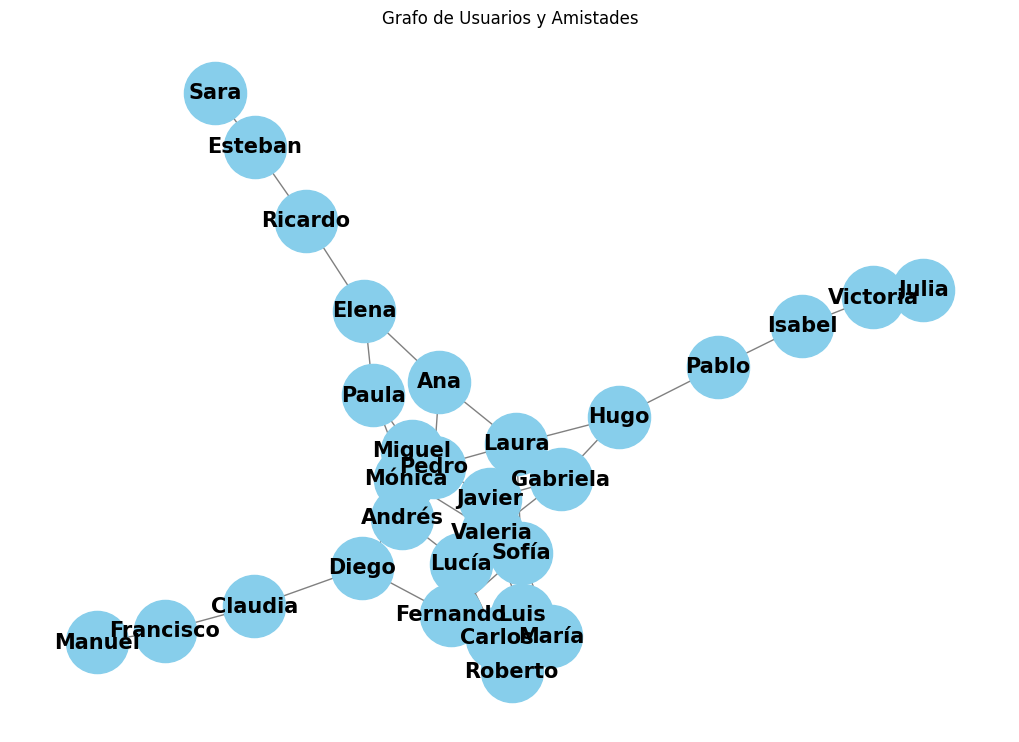

No existe un camino entre nombre_usuario1 y nombre_usuario2
Connection closed successfully


In [15]:
from collections import deque
import matplotlib.pyplot as plt
#from conexion import obtener_amistades, obtener_nombres_usuarios, conectar, cerrar_conexion
import networkx as nx

# Función que implementa BFS para encontrar el camino más corto
def shortest_path(graph, person1, person2):
    # Verificar si las dos personas están en el grafo
    if person1 not in graph or person2 not in graph:
        return None

    # Utilizar una cola para realizar BFS
    queue = deque([(person1, [person1])])  # Cada elemento es (nodo_actual, camino)

    # Conjunto para rastrear los nodos visitados
    visited = set()

    while queue:
        current_person, path = queue.popleft()

        # Marcar como visitado el nodo actual
        if current_person in visited:
            continue
        visited.add(current_person)

        # Verificar si llegamos a la persona objetivo
        if current_person == person2:
            return path  # Retorna el camino encontrado

        # Añadir los vecinos no visitados a la cola
        for neighbor in graph.neighbors(current_person):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return None  # Retorna None si no existe un camino entre person1 y person2



# Crear el grafo de amistades
def crear_grafo(amistades, conexion):
    # Obtener los nombres de los usuarios desde la base de datos
    usuarios = obtener_nombres_usuarios(conexion)

    G = nx.Graph()

    # Recorrer las amistades y agregar las relaciones al grafo
    for usuario1, usuario2 in amistades:
        nombre_usuario1 = usuarios.get(usuario1)
        nombre_usuario2 = usuarios.get(usuario2)

        if nombre_usuario1 and nombre_usuario2:
            G.add_edge(nombre_usuario1, nombre_usuario2)

    # Visualizar el grafo con Matplotlib
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)  # Layout de los nodos
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold',
            edge_color='gray')
    plt.title("Grafo de Usuarios y Amistades")
    plt.show()

    return G

# Probar la búsqueda del camino más corto entre dos usuarios
def probar_camino_mas_corto(graph, person1, person2):
    camino = shortest_path(graph, person1, person2)
    if camino:
        print(f"Camino más corto entre {person1} y {person2}: {' -> '.join(camino)}")
    else:
        print(f"No existe un camino entre {person1} y {person2}")

# Función principal
def main():
    # Conectar a la base de datos
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            G = crear_grafo(amistades, conexion)

            # Probar la búsqueda del camino más corto entre dos personas
            # Cambia los valores de person1 y person2 para probar con usuarios específicos
            person1 = "nombre_usuario1"  # Reemplaza con un nombre de usuario válido
            person2 = "nombre_usuario2"  # Reemplaza con un nombre de usuario válido
            probar_camino_mas_corto(G, person1, person2)

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")

if __name__ == "__main__":
    main()


#PREGUNTA 5

Connected to the database successfully


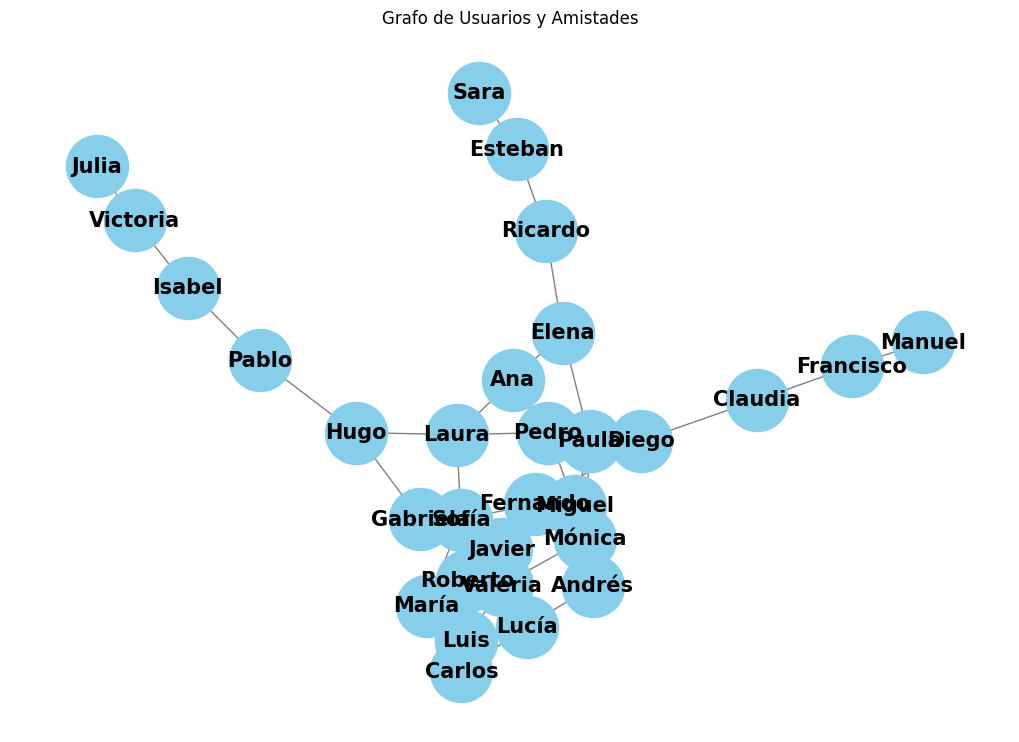

¿La red tiene ciclos?: True
Connection closed successfully


In [16]:
#from Problema1 import *
def dfs_cycle(graph, node, visited, parent):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            if dfs_cycle(graph, neighbor, visited, node):
                return True
        elif neighbor != parent:
            return True
    return False


# Función para detectar ciclos en el grafo
def has_cycle(graph):
    visited = set()

    # Recorremos cada nodo en el grafo
    for node in graph:
        if node not in visited:
            if dfs_cycle(graph, node, visited, None):
                return True
    return False
def main():
    conexion = conectar()

    if conexion:
        # Obtener las amistades desde la base de datos
        amistades = obtener_amistades(conexion)

        if amistades:
            # Crear el grafo a partir de las amistades obtenidas
            grafo = crear_grafo(amistades, conexion)
            # Detectar si hay ciclos en la red social
            tiene_ciclo = has_cycle(grafo)
            print(f"¿La red tiene ciclos?: {tiene_ciclo}")

        # Cerrar la conexión a la base de datos
        cerrar_conexion(conexion)
    else:
        print("No se pudo conectar a la base de datos")


if __name__ == "__main__":
    main()